# **Import  libraries and load data**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings 
warnings.filterwarnings("ignore")

df=pd.read_csv("/kaggle/input/medical-condition-prediction-dataset/medical_conditions_dataset.csv")
print(df.info())
print("*****************")
print(df.isnull().sum())
print("*****************")
print(df.head())
print("*****************")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   full_name       10000 non-null  object 
 2   age             5445 non-null   float64
 3   gender          10000 non-null  object 
 4   smoking_status  10000 non-null  object 
 5   bmi             4652 non-null   float64
 6   blood_pressure  3766 non-null   float64
 7   glucose_levels  4756 non-null   float64
 8   condition       10000 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 703.2+ KB
None
*****************
id                   0
full_name            0
age               4555
gender               0
smoking_status       0
bmi               5348
blood_pressure    6234
glucose_levels    5244
condition            0
dtype: int64
*****************
   id full_name   age gender smoking_status        bmi  blood_pressure  \

In [2]:
print(df['gender'].value_counts())
print(df['smoking_status'].value_counts())
print(df['condition'].value_counts())


gender
male      8506
female    1494
Name: count, dtype: int64
smoking_status
Non-Smoker    9014
Smoker         986
Name: count, dtype: int64
condition
Diabetic     6013
Pneumonia    2527
Cancer       1460
Name: count, dtype: int64


# **EDA**

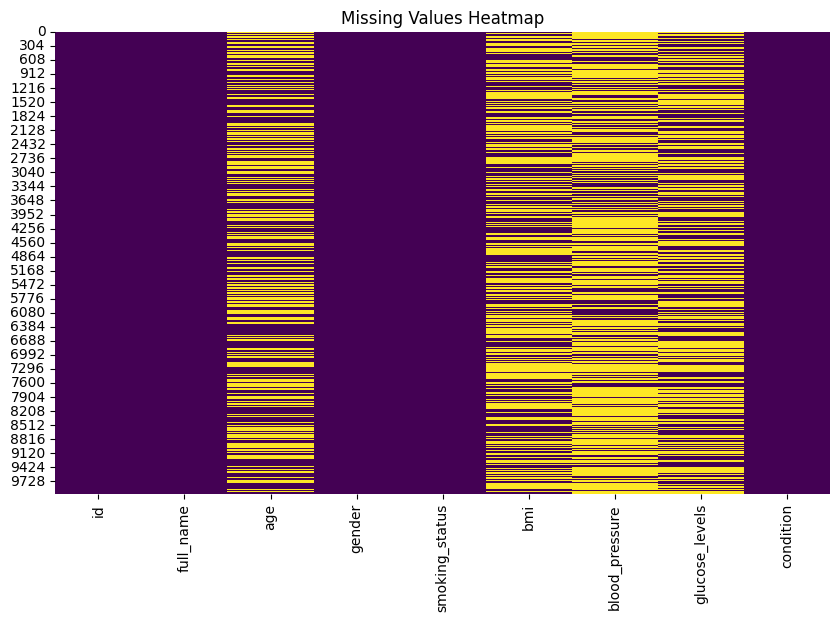

In [3]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [4]:
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

df['age'] = mean_imputer.fit_transform(df[['age']])
df['bmi'] = mean_imputer.fit_transform(df[['bmi']])
df['blood_pressure'] = median_imputer.fit_transform(df[['blood_pressure']])
df['glucose_levels'] = mean_imputer.fit_transform(df[['glucose_levels']])

# Print the DataFrame and the number of missing values in each column
print("DataFrame after imputation:")
print(df.head())
print("\nNumber of missing values in each column:")
print(df.isnull().sum())

DataFrame after imputation:
   id full_name        age gender smoking_status        bmi  blood_pressure  \
0   1  User0001  53.541598   male     Non-Smoker  27.423420      134.821040   
1   2  User0002  30.000000   male     Non-Smoker  27.423420      105.315064   
2   3  User0003  18.000000   male     Non-Smoker  35.612486      134.821040   
3   4  User0004  53.541598   male     Non-Smoker  27.423420       99.119829   
4   5  User0005  76.000000   male     Non-Smoker  27.423420      134.821040   

   glucose_levels  condition  
0      135.219608  Pneumonia  
1      135.219608   Diabetic  
2      135.219608  Pneumonia  
3      135.219608  Pneumonia  
4      135.219608   Diabetic  

Number of missing values in each column:
id                0
full_name         0
age               0
gender            0
smoking_status    0
bmi               0
blood_pressure    0
glucose_levels    0
condition         0
dtype: int64


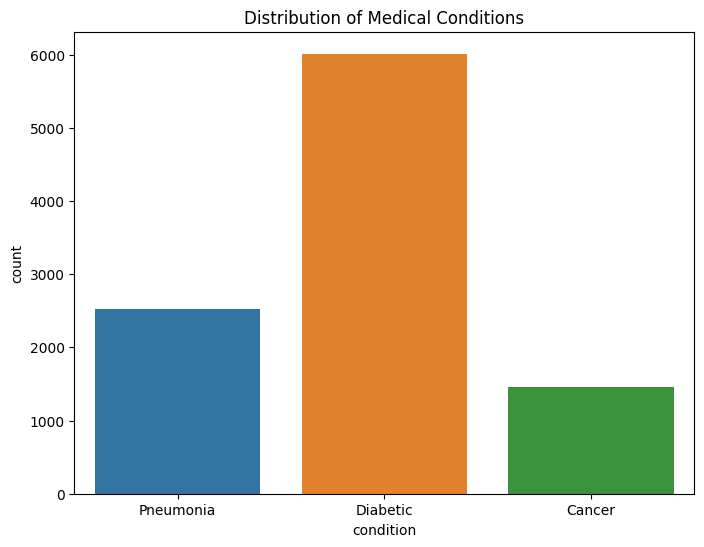

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='condition')
plt.title('Distribution of Medical Conditions')
plt.show()

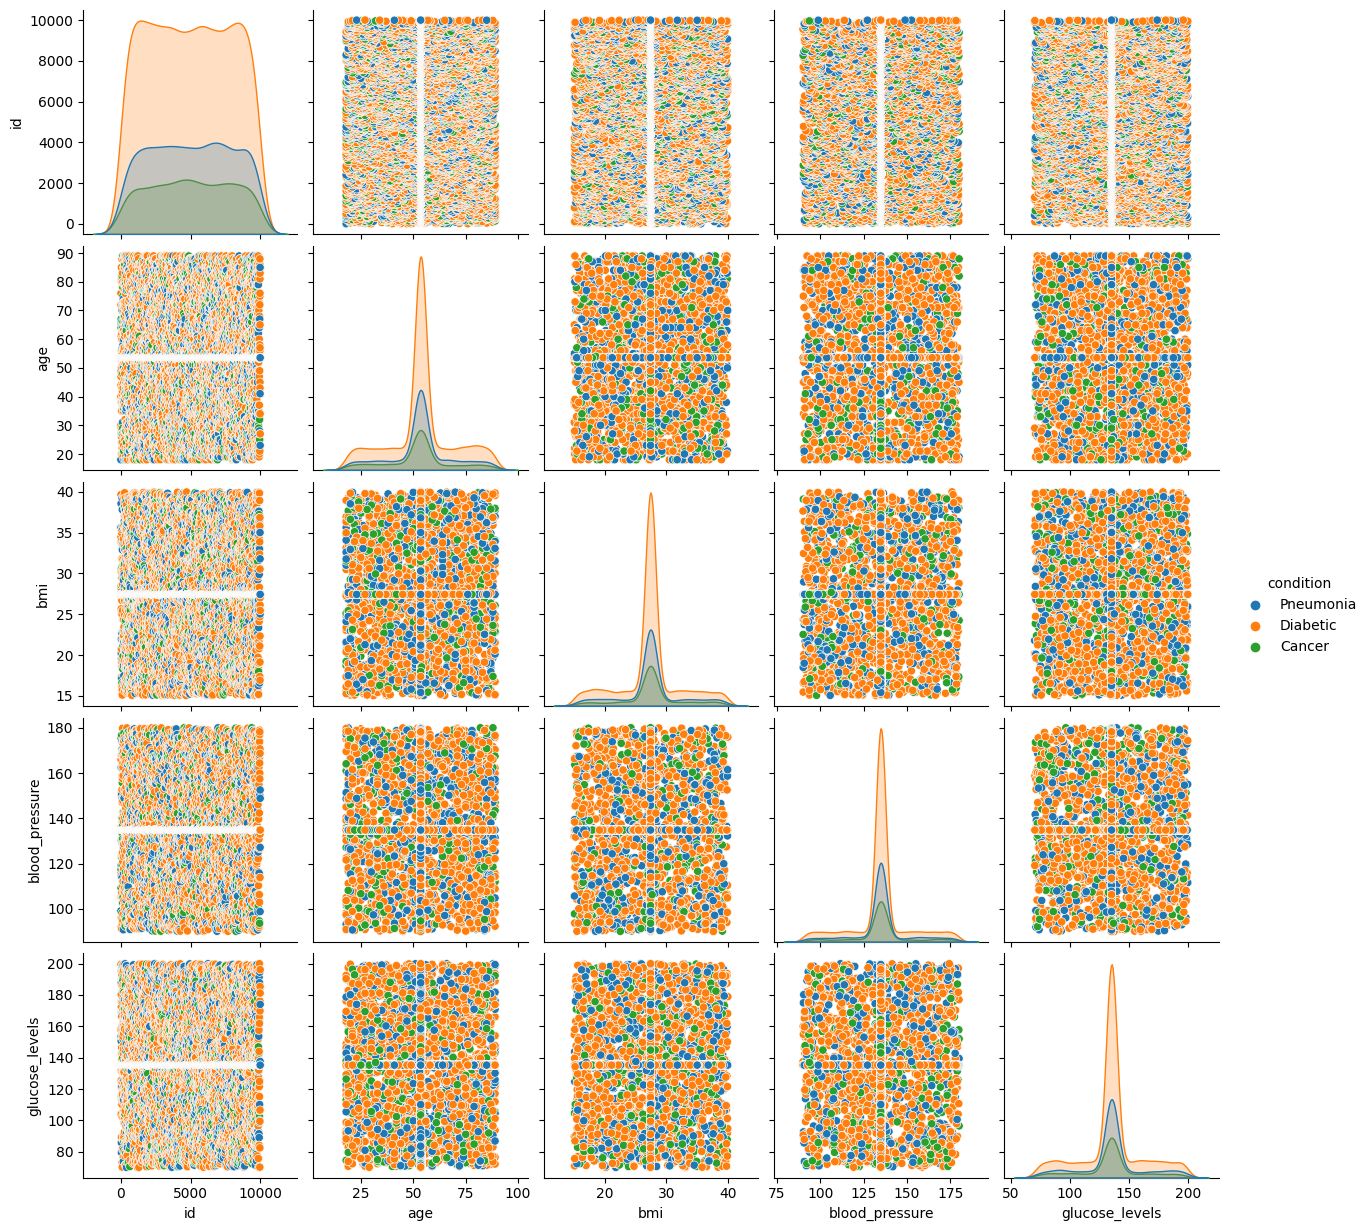

In [6]:
sns.pairplot(df, hue='condition', diag_kind='kde')
plt.show()

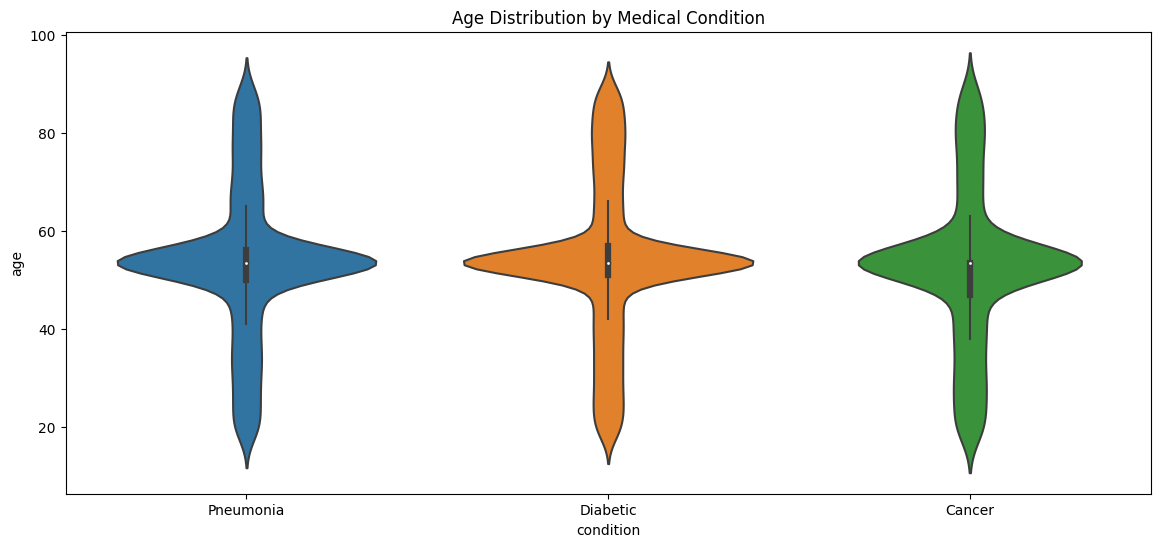

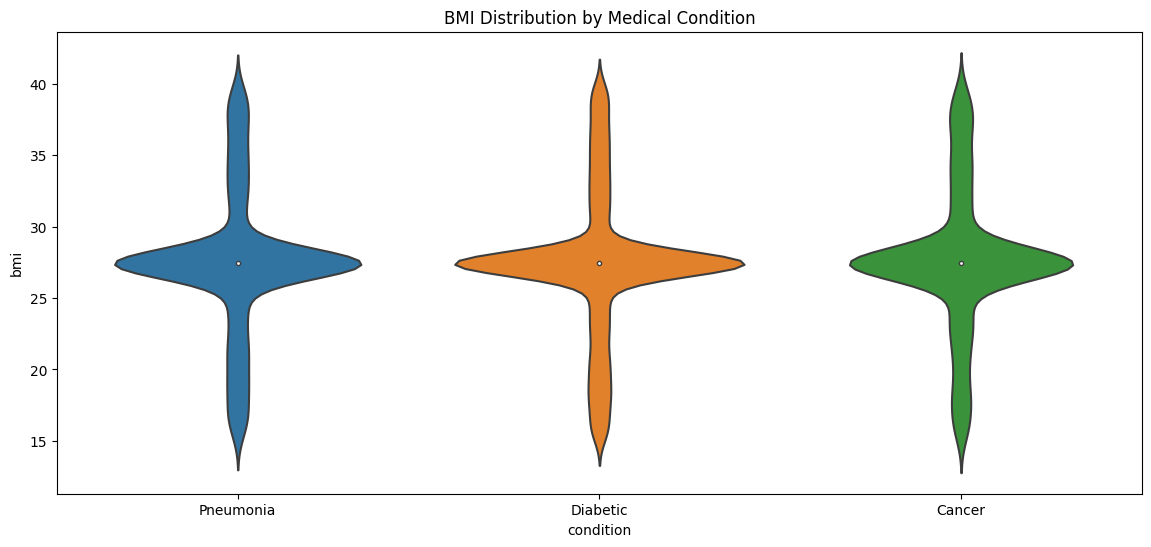

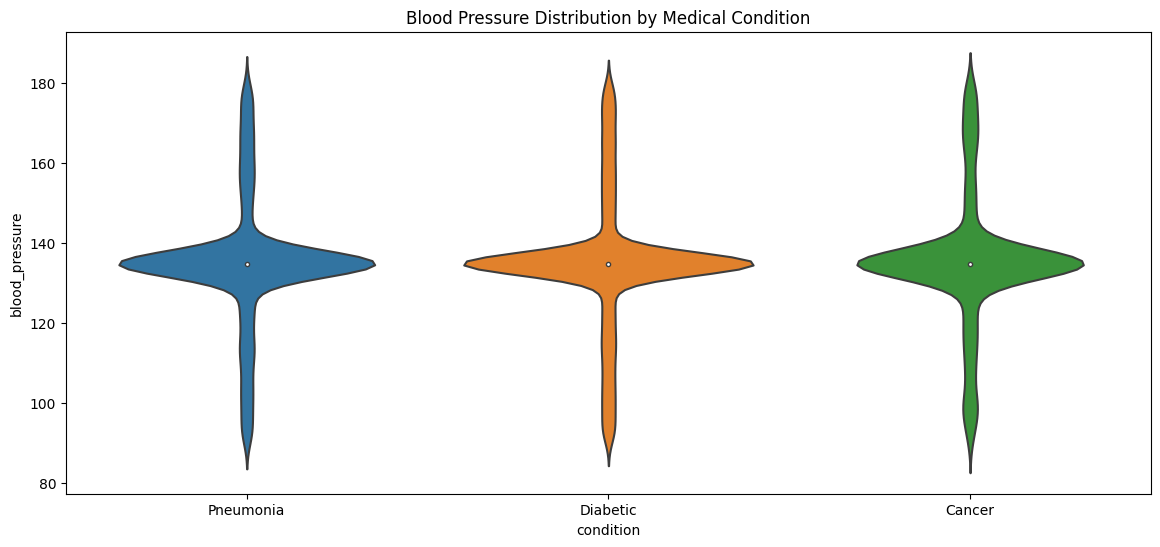

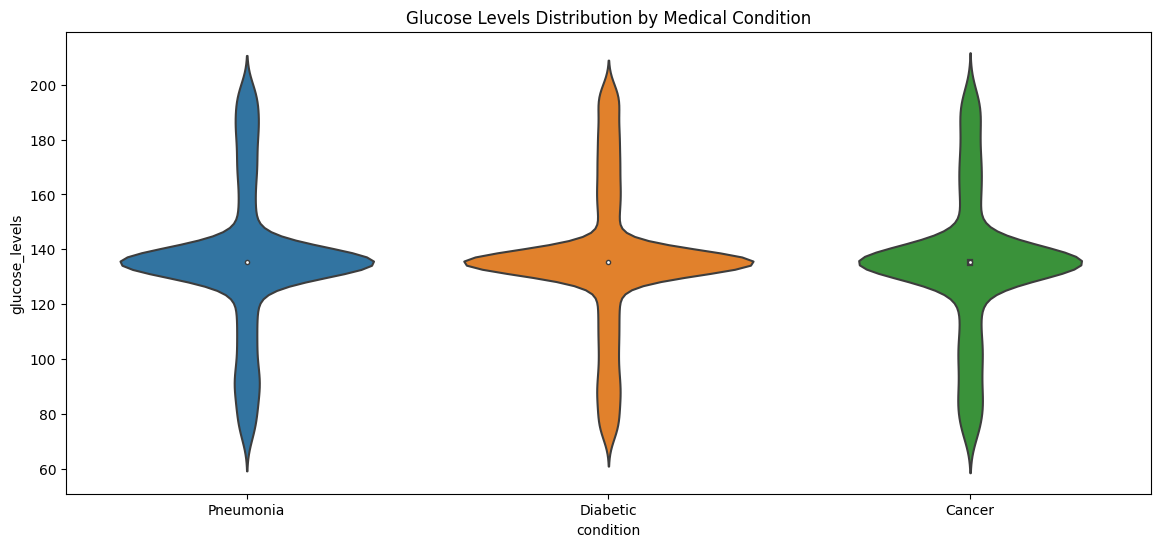

In [7]:
plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='condition', y='age')
plt.title('Age Distribution by Medical Condition')
plt.show()

plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='condition', y='bmi')
plt.title('BMI Distribution by Medical Condition')
plt.show()

plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='condition', y='blood_pressure')
plt.title('Blood Pressure Distribution by Medical Condition')
plt.show()

plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='condition', y='glucose_levels')
plt.title('Glucose Levels Distribution by Medical Condition')
plt.show()

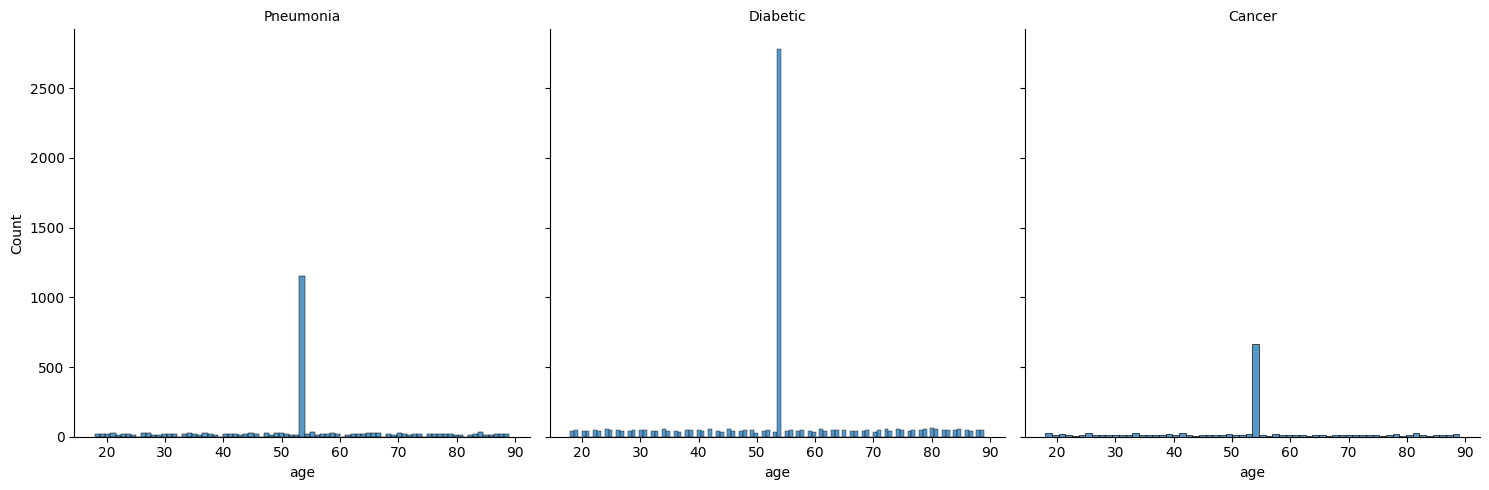

In [8]:
g = sns.FacetGrid(df, col="condition", col_wrap=3, height=5)
g.map(sns.histplot, "age")
g.set_titles("{col_name}")
plt.show()

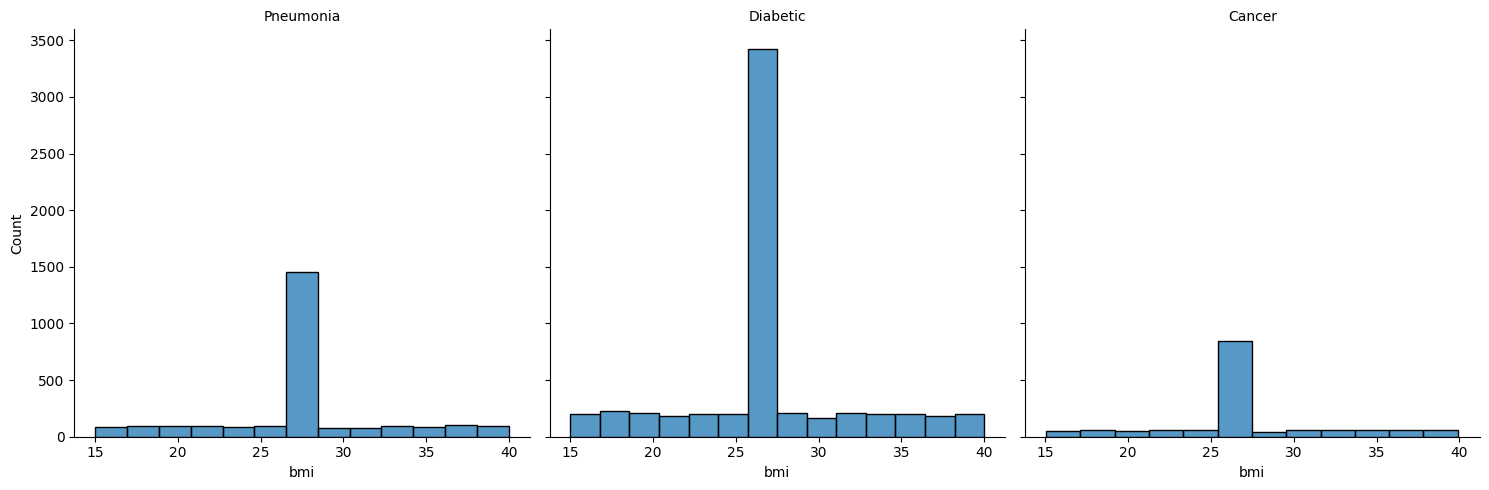

In [9]:
g = sns.FacetGrid(df, col="condition", col_wrap=3, height=5)
g.map(sns.histplot, "bmi")
g.set_titles("{col_name}")
plt.show()

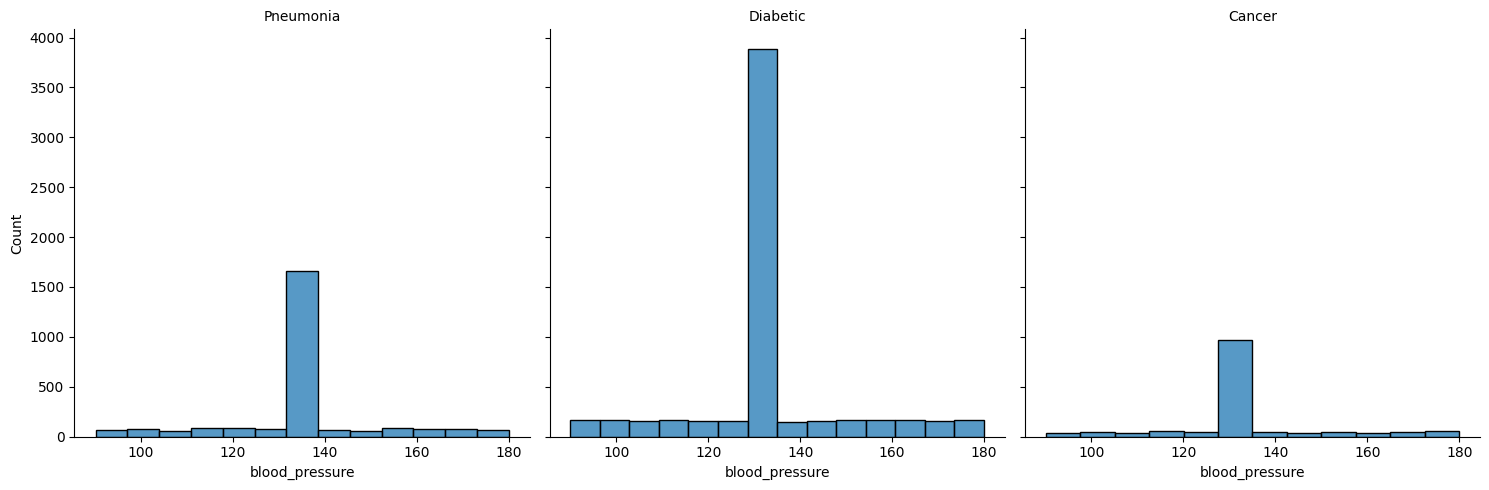

In [10]:
g = sns.FacetGrid(df, col="condition", col_wrap=3, height=5)
g.map(sns.histplot, "blood_pressure")
g.set_titles("{col_name}")
plt.show()

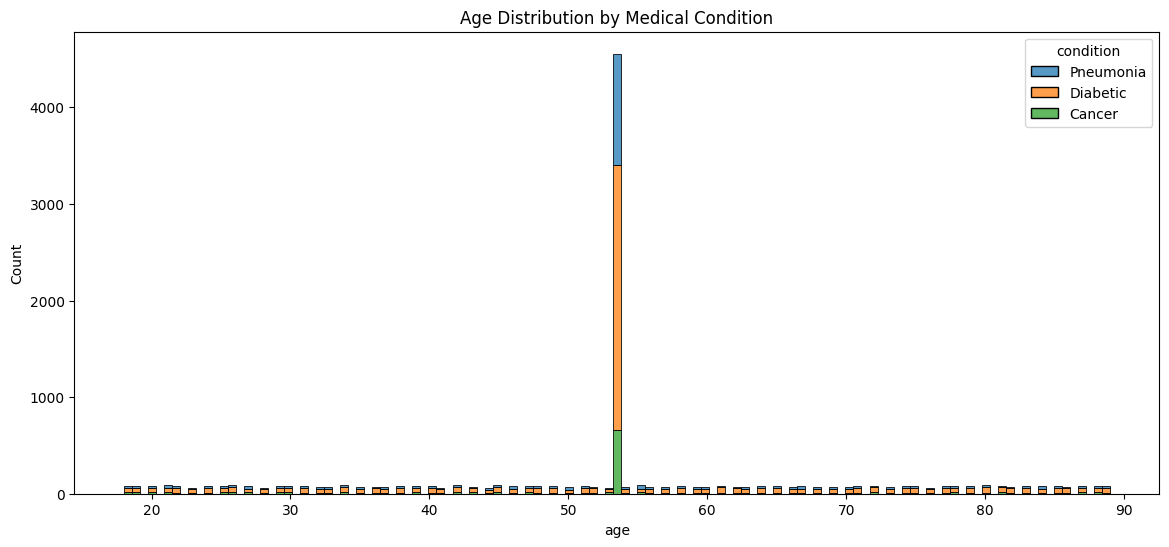

In [11]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='age', hue='condition', multiple='stack')
plt.title('Age Distribution by Medical Condition')
plt.show()

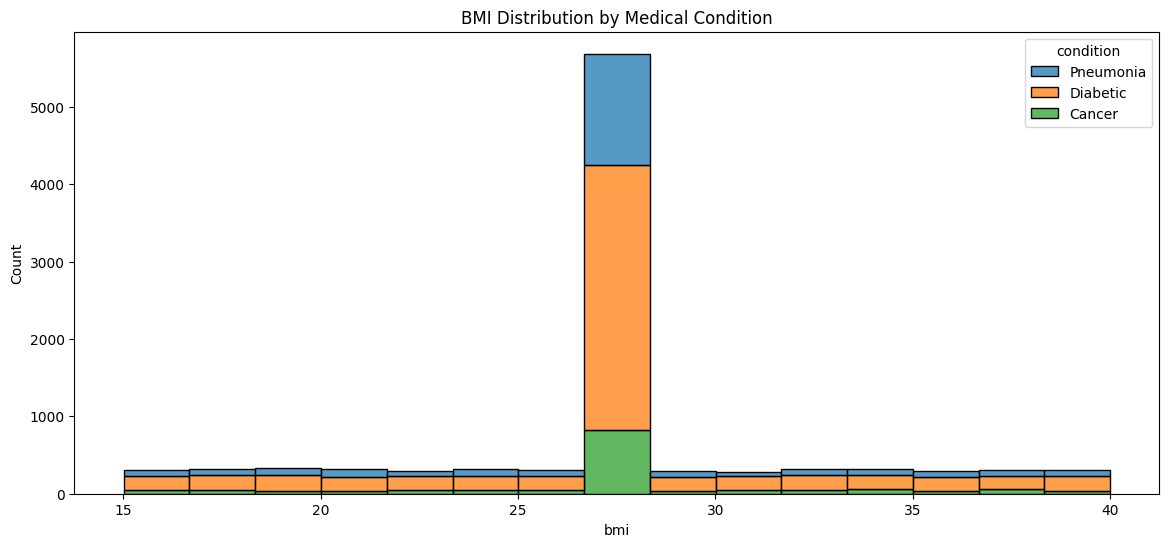

In [12]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='bmi', hue='condition', multiple='stack')
plt.title('BMI Distribution by Medical Condition')
plt.show()


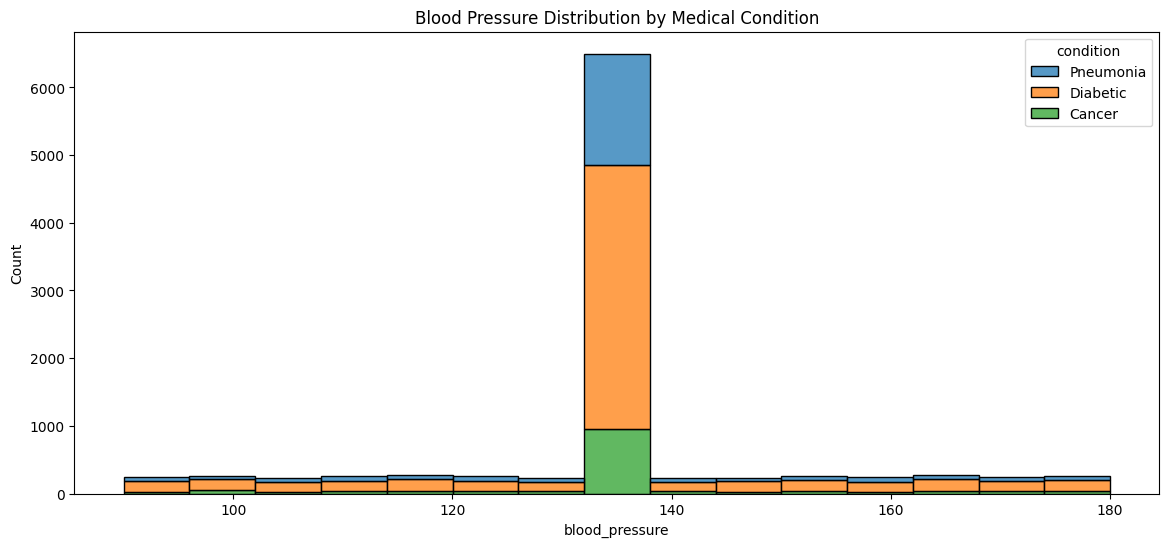

In [13]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='blood_pressure', hue='condition', multiple='stack')
plt.title('Blood Pressure Distribution by Medical Condition')
plt.show()

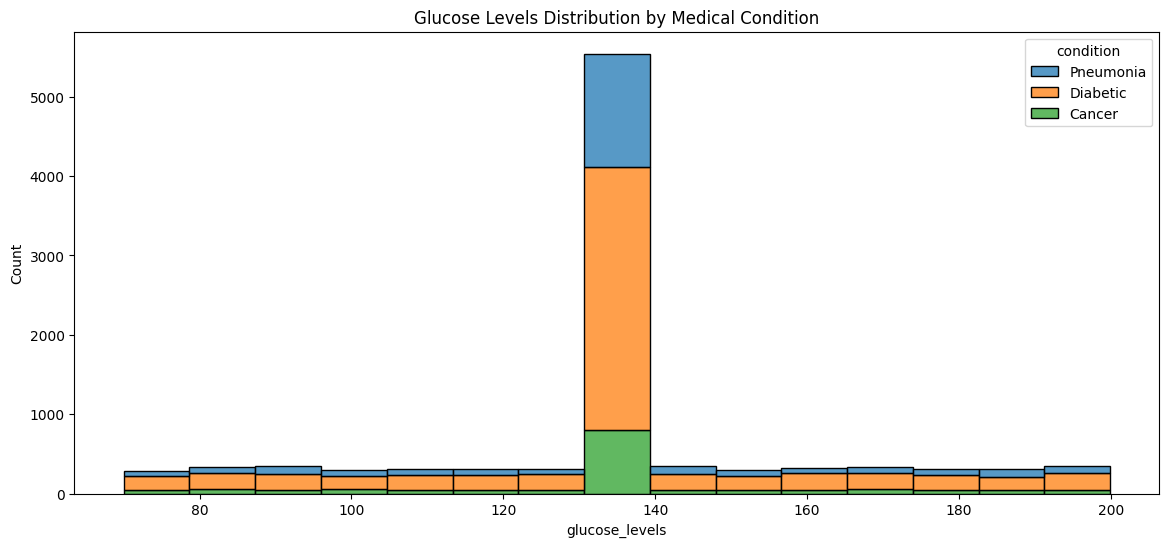

In [14]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='glucose_levels', hue='condition', multiple='stack')
plt.title('Glucose Levels Distribution by Medical Condition')
plt.show()

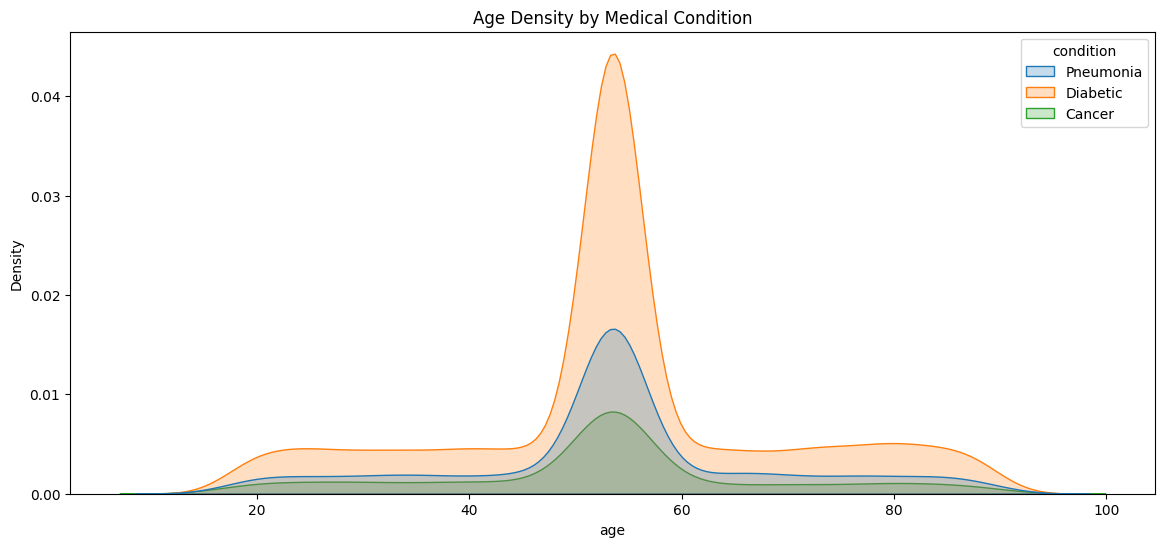

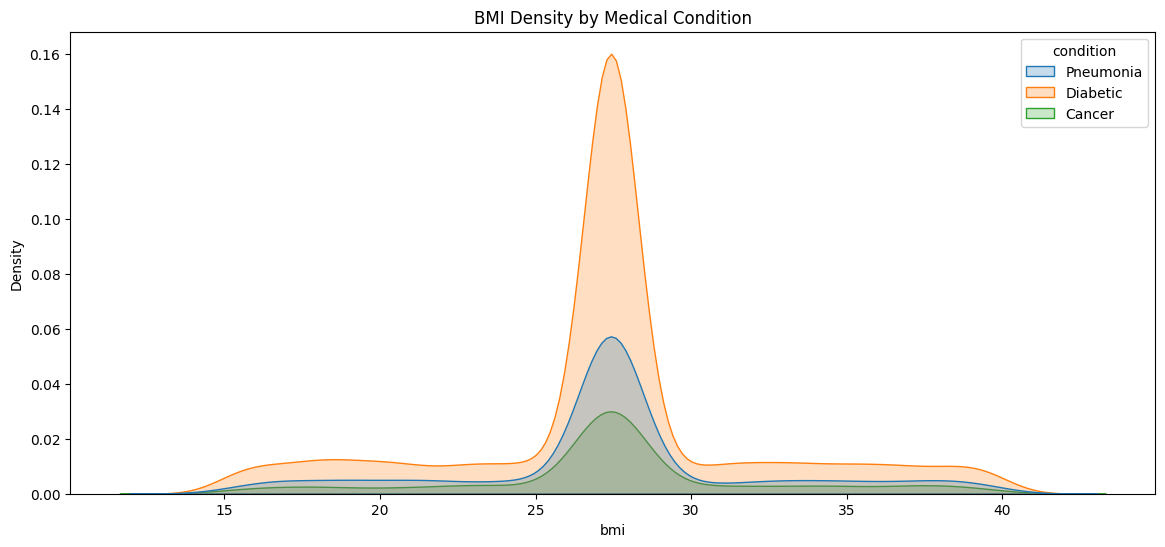

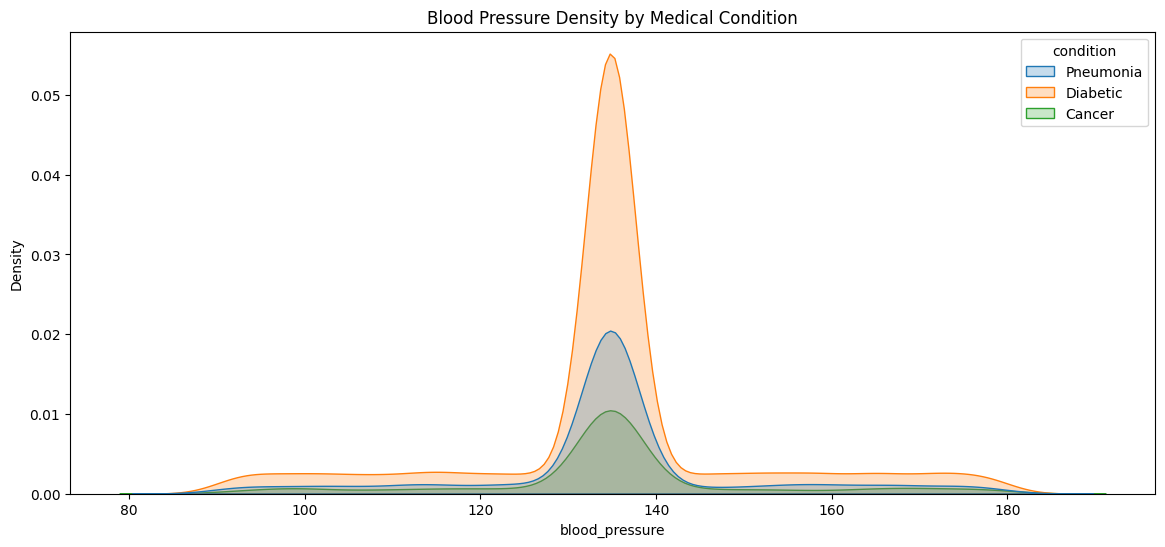

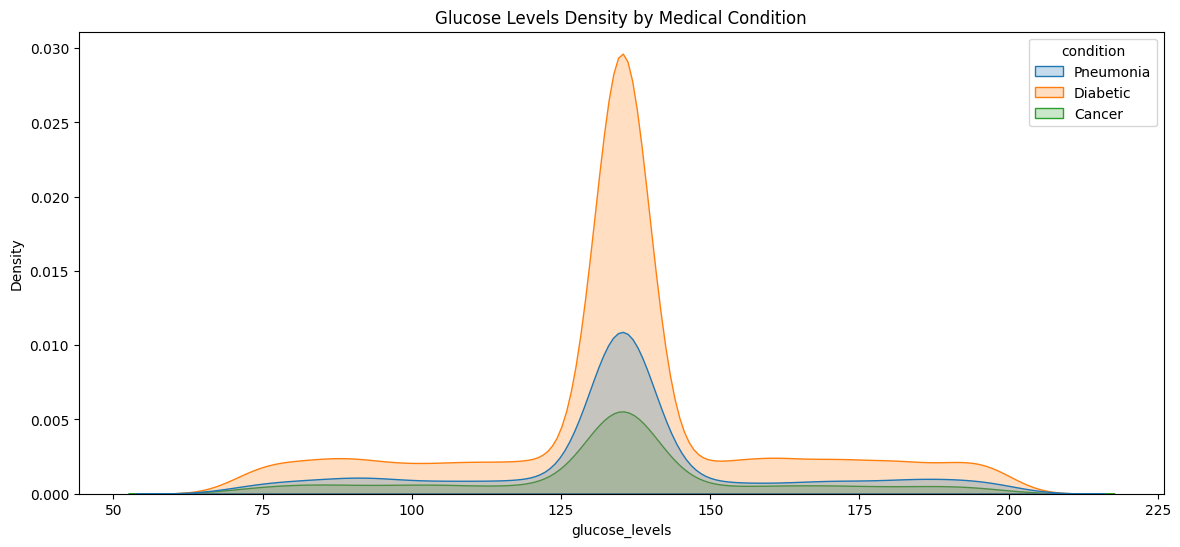

In [15]:
plt.figure(figsize=(14, 6))
sns.kdeplot(data=df, x='age', hue='condition', fill=True)
plt.title('Age Density by Medical Condition')
plt.show()

plt.figure(figsize=(14, 6))
sns.kdeplot(data=df, x='bmi', hue='condition', fill=True)
plt.title('BMI Density by Medical Condition')
plt.show()

plt.figure(figsize=(14, 6))
sns.kdeplot(data=df, x='blood_pressure', hue='condition', fill=True)
plt.title('Blood Pressure Density by Medical Condition')
plt.show()

plt.figure(figsize=(14, 6))
sns.kdeplot(data=df, x='glucose_levels', hue='condition', fill=True)
plt.title('Glucose Levels Density by Medical Condition')
plt.show()


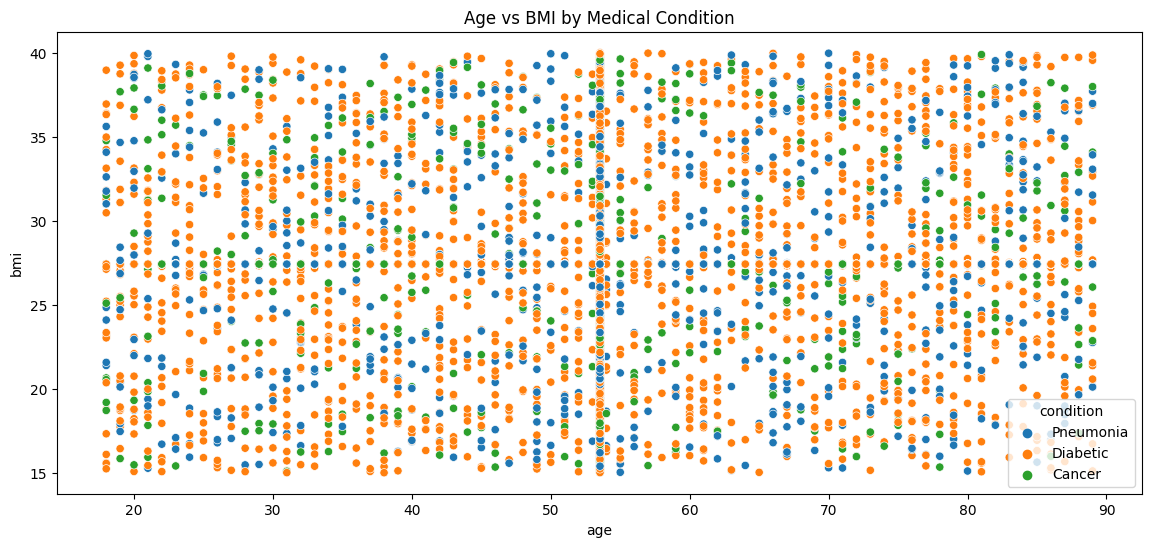

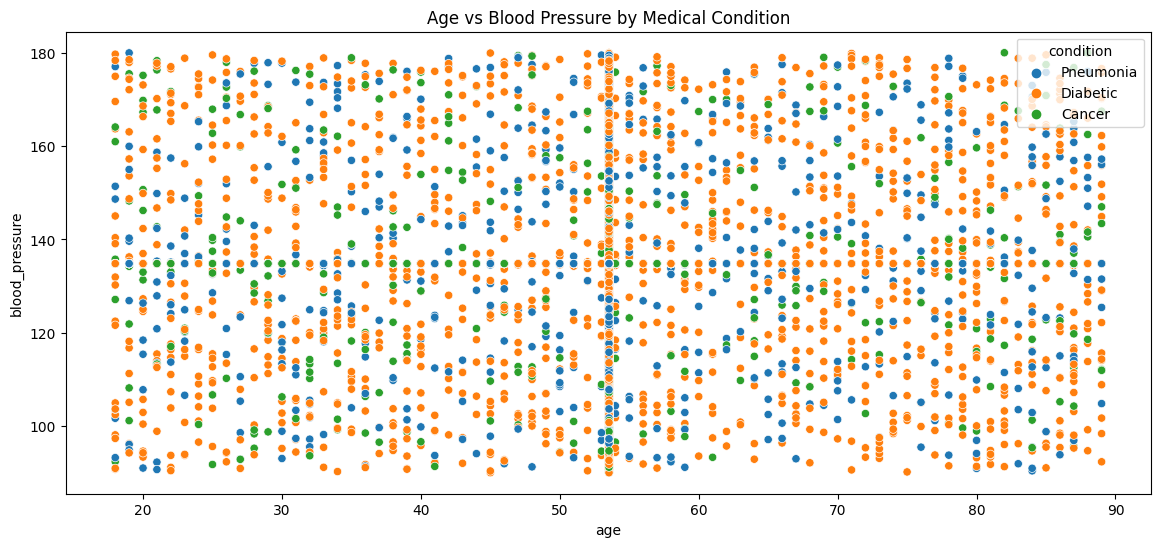

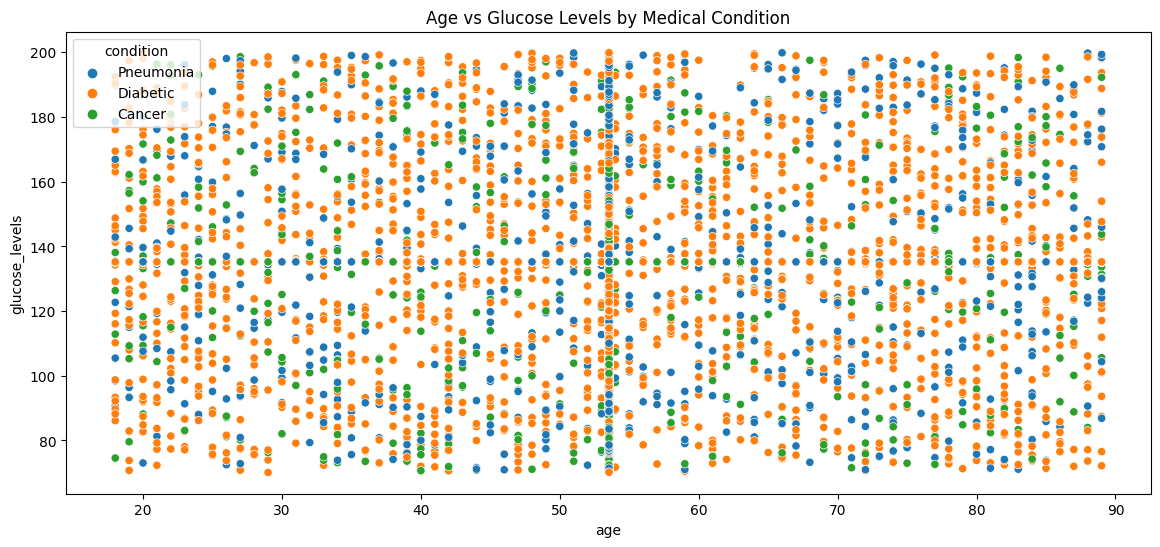

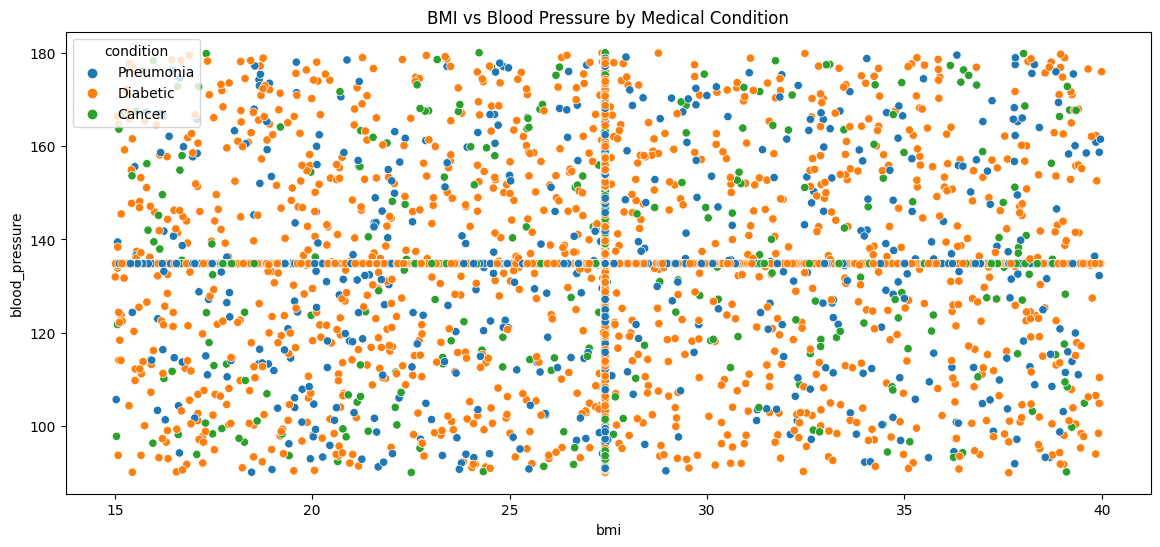

In [16]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='age', y='bmi', hue='condition')
plt.title('Age vs BMI by Medical Condition')
plt.show()

plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='age', y='blood_pressure', hue='condition')
plt.title('Age vs Blood Pressure by Medical Condition')
plt.show()

plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='age', y='glucose_levels', hue='condition')
plt.title('Age vs Glucose Levels by Medical Condition')
plt.show()

plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='bmi', y='blood_pressure', hue='condition')
plt.title('BMI vs Blood Pressure by Medical Condition')
plt.show()
